In [25]:
import time
import warnings
import requests
import pandas as pd
import numpy as np
import enchant
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# DATA SETUP

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('cleaned_df.csv')

In [5]:
df = df.drop(columns='Unnamed: 0')

In [6]:
df

,text,iphone_subreddit
0,What's App Slow on iPhone compared to Android,1
1,Iphone X expansive offer (Email Submit).,1
2,"Got my first job, saved up for over a year, an...",1
3,Get S&amp; P iPhone XS,1
4,Iphone 12 mini standby issues,1
...,...,...
19995,[SELF] Recomendo - The app that gives tv shows...,0
19996,Ticwatch Pro 3 Review: Wear OS Finally Works!,0
19997,[Mr. Mobile] Ticwatch Pro 3 Review: Wear OS Fi...,0
19998,Ticwatch Pro 3 Review: Wear OS Finally Works!,0


In [ ]:
### Creating a sublist of sentences in each cell for the df['text'] column

In [7]:
# A:

value_list = []
for value in df['text']:
    value_list.append(value.strip().split('.'))

value_list
val_list_final = []
for value in value_list:
    val_set = []
    for val in value:
        if len(val) == 0:
            continue
        else:
            val_set.append(val.strip())
    val_list_final.append(val_set)

val_list_final[:5]
     

[["What's App Slow on iPhone compared to Android"],
 ['Iphone X expansive offer (Email Submit)'],
 ['Got my first job, saved up for over a year, and voila',
  'My humble little home office'],
 ['Get S&amp; P iPhone XS'],
 ['Iphone 12 mini standby issues']]

In [ ]:
### Running the Vader sentiment analyzer on each sentence in the df['text'] column

In [8]:
analyzer = SentimentIntensityAnalyzer()
vader_list = []
for value in val_list_final:
    vaders = []
    for val in value:
        vader = analyzer.polarity_scores(val)
        vaders.append(vader)
    vader_list.append(vaders)

vader_list
df['vader'] = vader_list    

In [9]:
df['vader'].head()

0    [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...
1    [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...
2    [{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'com...
3    [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...
4    [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...
Name: vader, dtype: object

In [ ]:
### Creating columns in the dataset for each cell's vader score 

In [10]:
df['vader'] = [value[0] for value in df['vader']]

In [11]:
df['vader_compound'] = [value['compound'] for value in df['vader']]

In [12]:
df['vader_pos'] = [value['pos'] for value in df['vader']]

In [13]:
df['vader_neg'] = [value['neg'] for value in df['vader']]

In [14]:
df['vader_neu'] = [value['neu'] for value in df['vader']]

In [15]:
df

,text,iphone_subreddit,vader,vader_compound,vader_pos,vader_neg,vader_neu
0,What's App Slow on iPhone compared to Android,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.0,1.000
1,Iphone X expansive offer (Email Submit).,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.0,1.000
2,"Got my first job, saved up for over a year, an...",1,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",0.4215,0.203,0.0,0.797
3,Get S&amp; P iPhone XS,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.0,1.000
4,Iphone 12 mini standby issues,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.0,1.000
...,...,...,...,...,...,...,...
19995,[SELF] Recomendo - The app that gives tv shows...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.0,1.000
19996,Ticwatch Pro 3 Review: Wear OS Finally Works!,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.0,1.000
19997,[Mr. Mobile] Ticwatch Pro 3 Review: Wear OS Fi...,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.0,1.000
19998,Ticwatch Pro 3 Review: Wear OS Finally Works!,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.0,1.000


In [16]:
df = df.drop(columns='vader')

In [17]:
df

,text,iphone_subreddit,vader_compound,vader_pos,vader_neg,vader_neu
0,What's App Slow on iPhone compared to Android,1,0.0000,0.000,0.0,1.000
1,Iphone X expansive offer (Email Submit).,1,0.0000,0.000,0.0,1.000
2,"Got my first job, saved up for over a year, an...",1,0.4215,0.203,0.0,0.797
3,Get S&amp; P iPhone XS,1,0.0000,0.000,0.0,1.000
4,Iphone 12 mini standby issues,1,0.0000,0.000,0.0,1.000
...,...,...,...,...,...,...
19995,[SELF] Recomendo - The app that gives tv shows...,0,0.0000,0.000,0.0,1.000
19996,Ticwatch Pro 3 Review: Wear OS Finally Works!,0,0.0000,0.000,0.0,1.000
19997,[Mr. Mobile] Ticwatch Pro 3 Review: Wear OS Fi...,0,0.0000,0.000,0.0,1.000
19998,Ticwatch Pro 3 Review: Wear OS Finally Works!,0,0.0000,0.000,0.0,1.000


# EDA

In [ ]:
### Showing the top 15 vader compound scores for Android phones

In [18]:
df.loc[df['iphone_subreddit'] == 0][df['vader_compound'] > .6]\
[df['text'].str.contains('camera')].sort_values(by='vader_compound', ascending=False).head(15)

,text,iphone_subreddit,vader_compound,vader_pos,vader_neg,vader_neu
16388,Can any recommend the best budget phone under ...,0,0.9217,0.468,0.000,0.532
10428,Best Price High quality smartphone super macro...,0,0.9081,0.487,0.000,0.513
13468,Best super cheap (50-75~) android phone for Ve...,0,0.8442,0.323,0.000,0.677
19951,can you give me some advice on the best camera...,0,0.8360,0.345,0.000,0.655
14545,Qualcomm’s new Snapdragon 888 promises faster ...,0,0.8221,0.462,0.000,0.538
14547,Qualcomm’s new Snapdragon 888 promises faster ...,0,0.8221,0.462,0.000,0.538
18829,What android is best for battery nowadays? Wit...,0,0.8156,0.404,0.000,0.596
15462,Phones with best tele cameras (not for zooming...,0,0.8020,0.419,0.000,0.581
12469,With Samsung recently trying to solve under-di...,0,0.7906,0.237,0.000,0.763
18440,If I wanted my next Android to have a great ca...,0,0.7906,0.212,0.000,0.788


In [26]:
### Showing the top 15 vader compound scores for iPhones

In [19]:
df.loc[df['iphone_subreddit'] == 1][df['vader_compound'] > .6]\
[df['text'].str.contains('camera')].sort_values(by='vader_compound', ascending=False).head(15)

,text,iphone_subreddit,vader_compound,vader_pos,vader_neg,vader_neu
1621,Bi-Weekly Photography Thread | Share your best...,1,0.9039,0.318,0.000,0.682
6577,Iphone 12 mini - Front camera beauty filter???...,1,0.8818,0.188,0.035,0.777
6694,Yet another iPhone 12 pro or pro max threat :(...,1,0.8710,0.216,0.043,0.741
2804,Best free camera app for full control,1,0.8176,0.600,0.000,0.400
3190,Is there a good app or setting that can optimi...,1,0.8074,0.356,0.000,0.644
2369,My Iphone X camera won’t work! HELP PLEASE!,1,0.7935,0.540,0.000,0.460
2489,I love the way my 11 Pro Max’s cameras look in...,1,0.6696,0.257,0.000,0.743
6231,Why does it look like the XS has a better self...,1,0.6597,0.241,0.000,0.759
684,Best iPhone front camera,1,0.6369,0.583,0.000,0.417
1091,iPhone X was the last best iPhone camera (retu...,1,0.6369,0.276,0.000,0.724


In [20]:
print('android camera compound sentiment sum:', df.loc[df['iphone_subreddit'] == 0]\
      [df['text'].str.contains('camera')].sum()[2])

print('android photo compound sentiment sum:', df.loc[df['iphone_subreddit'] == 0]\
      [df['text'].str.contains('photo')].sum()[2])

print('android pix compound sentiment sum:', df.loc[df['iphone_subreddit'] == 0]\
      [df['text'].str.contains('pix')].sum()[2])

print('android pic compound sentiment sum:', df.loc[df['iphone_subreddit'] == 0]\
      [df['text'].str.contains('pic')].sum()[2])

print('android image compound sentiment sum:', df.loc[df['iphone_subreddit'] == 0]\
      [df['text'].str.contains('image')].sum()[2])

print('android video compound sentiment sum:', df.loc[df['iphone_subreddit'] == 0]\
      [df['text'].str.contains('video')].sum()[2])

print('android resolut compound sentiment sum:', df.loc[df['iphone_subreddit'] == 0]\
      [df['text'].str.contains('resolut')].sum()[2])

print('android app compound sentiment sum:', df.loc[df['iphone_subreddit'] == 0]\
      [df['text'].str.contains('app')].sum()[2])

android camera compound sentiment sum: 23.496100000000002
android photo compound sentiment sum: 3.2895
android pix compound sentiment sum: 3.4809999999999994
android pic compound sentiment sum: 4.494199999999999
android image compound sentiment sum: -0.9830999999999996
android video compound sentiment sum: 17.835
android resolut compound sentiment sum: 0.018500000000000016
android app compound sentiment sum: 121.1421


In [21]:
print('iphone camera compound sentiment sum:', df.loc[df['iphone_subreddit'] == 1]\
      [df['text'].str.contains('camera')].sum()[2])

print('iphone photo compound sentiment sum:', df.loc[df['iphone_subreddit'] == 1]\
      [df['text'].str.contains('photo')].sum()[2])

print('iphone pix compound sentiment sum:', df.loc[df['iphone_subreddit'] == 1]\
      [df['text'].str.contains('pix')].sum()[2])

print('iphone pic compound sentiment sum:', df.loc[df['iphone_subreddit'] == 1]\
      [df['text'].str.contains('pic')].sum()[2])

print('iphone image compound sentiment sum:', df.loc[df['iphone_subreddit'] == 1]\
      [df['text'].str.contains('image')].sum()[2])

print('iphone video compound sentiment sum:', df.loc[df['iphone_subreddit'] == 1]\
      [df['text'].str.contains('video')].sum()[2])

print('iphone resolut compound sentiment sum:', df.loc[df['iphone_subreddit'] == 1]\
      [df['text'].str.contains('resolut')].sum()[2])

print('iphone app compound sentiment sum:', df.loc[df['iphone_subreddit'] == 1]\
      [df['text'].str.contains('app')].sum()[2])

iphone camera compound sentiment sum: 1.4548000000000008
iphone photo compound sentiment sum: 8.8476
iphone pix compound sentiment sum: -1.1169
iphone pic compound sentiment sum: 0.7173000000000005
iphone image compound sentiment sum: 2.886
iphone video compound sentiment sum: 10.6523
iphone resolut compound sentiment sum: 0.8864000000000001
iphone app compound sentiment sum: 48.86840000000001


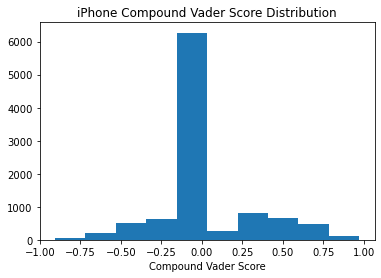

In [22]:
plt.hist(df.loc[df['iphone_subreddit'] == 1]['vader_compound'])
plt.title('iPhone Compound Vader Score Distribution')
plt.xlabel('Compound Vader Score');

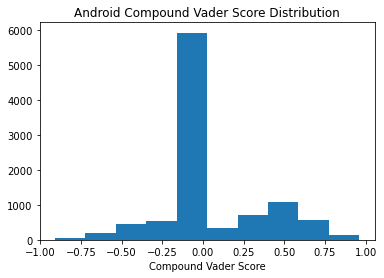

In [23]:
plt.hist(df.loc[df['iphone_subreddit'] == 0]['vader_compound']);
plt.title('Android Compound Vader Score Distribution')
plt.xlabel('Compound Vader Score');

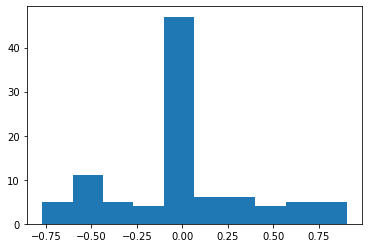

In [24]:
plt.hist(df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('pic')]['vader_compound']);